# Matriz de Covarianza

La covarianza nos indica cómo dos variables de un conjunto de datos varían al mismo tiempo respecto de la media o el promedio. Cuando una aumenta, la otra también? ¿Cuando una aumenta la otra disminuye? ¿O es indistinto? ¿Existe una relación lineal entre ellas? 
Este concepto está muy relacionado al de varianza, solo que esta última aplica solo para una variable.

## Recordemos la varianza y la desviación estándar

Si tomamos solo una variable, la varianza hace referencia a cómo esa variable, en sus distintos valores, va cambiando de valor a lo largo de todas las observaciones, respecto de la media. SI hay valores muy dispares y alejados de la media, la varianza será mayor. Por el contrario, si los valores de forma general se acercan más a la media, la varianza será menor.

![Varianza](./img/m_covarianza1.png)

La fórmula de la varianza de una variable es la que se ve en la siguiente imagen.

Como aclaración, recordemos que **población** se refiere al total de un conjunto de datos (por ejemplo, las alturas de todas las personas del mundo), mientras que **muestra** hace referencia a un grupo más reducido de datos de la población.

![Varianza](./img/m_covarianza2.png)

Por último, la desviación estándar no es otra cosa que la raíz cuadrada del resultado de la muestra:

### Desviación estándar de una población

$\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2}$

Donde:
- $\sigma$ = desviación estándar de la población
- $N$ = número total de elementos en la población
- $x_i$ = cada valor individual en el conjunto de datos
- $\mu$ = media de la población, es decir, \( \mu = \frac{1}{N} \sum_{i=1}^{N} x_i \)

### Desviación estándar de una muestra

$s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2}$

Donde:
- $s$ = desviación estándar de la muestra
- $n$ = número total de elementos en la muestra
- $x_i$ = cada valor individual en la muestra
- $\bar{x}$ = media de la muestra, es decir, $\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$

## Varianza y desviación estándar con Pandas

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# quitar notación científica
pd.options.display.float_format = '{:.2f}'.format

# Contexto:
#   (0) Edad,  
#   (1) Gastos mensuales en Medicina, 
#   (2) Gastos mensuales en Educación, y
#   (3) Gastos mensuales en Cacahuates

datos = {"edad" : [35, 50, 22, 45, 18, 75, 55, 20, 23, 49],
         "medicina" : [200, 1500, 150, 250, 0, 2500, 1400, 50, 0, 600],
         "educacion" : [1200, 0, 7500, 2200, 8300, 0, 0, 4900, 5100, 800],
         "cacahuates" : [10, 15, 0, 10, 20, 10, 20, 10, 15, 0]}
         
datos = pd.DataFrame(datos)
datos

,edad,medicina,educacion,cacahuates
0,35,200,1200,10
1,50,1500,0,15
2,22,150,7500,0
3,45,250,2200,10
4,18,0,8300,20
5,75,2500,0,10
6,55,1400,0,20
7,20,50,4900,10
8,23,0,5100,15
9,49,600,800,0


In [9]:
datos.aggregate(["std", "var"])

,edad,medicina,educacion,cacahuates
std,18.77,851.49,3198.61,6.99
var,352.40,725027.78,10231111.11,48.89


## Graficando desviación estándar

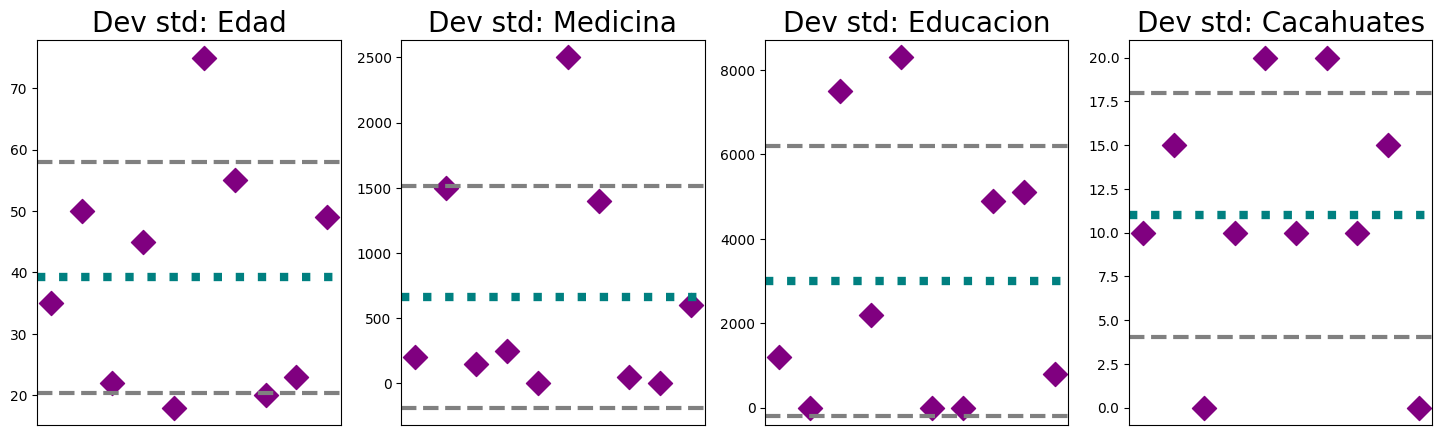

In [11]:
def subgrafica_std(datos, columna, fig, posicion): 
    ax = fig.add_subplot(1, 4, posicion)    
    
    # calculando media y desviación estándar
    media = datos[columna].mean() 
    std = datos[columna].std()
   
    # graficando datos
    ax.scatter(range(len(datos[columna])), datos[columna],
               marker="D", s=150, color="purple")
    
    # graficando media y desviación estándar 
    ax.axhline(y=media+std, color="gray", linestyle="--", linewidth=3)
    ax.axhline(y=media, color="teal", linestyle=":",  linewidth=6)
    ax.axhline(y=media-std, color="gray", linestyle="--", linewidth=3)

    # presentación de gráfica
    ax.set_title("Dev std: " + columna.capitalize(), fontsize=20)
    ax.set_xticks(range(len(datos[columna])))
    ax.get_xaxis().set_visible(False)


# Desviaciones estándar para todas las columnas    
fig = plt.figure(figsize=(18, 5))     

subgrafica_std(datos, "edad", fig, 1)
subgrafica_std(datos, "medicina", fig, 2)
subgrafica_std(datos, "educacion", fig, 3)
subgrafica_std(datos, "cacahuates", fig, 4)

plt.show()

## Matriz de covarianza

Fórmula de la covarianza:

![Fórmula covarianza](./img/m_covarianza3.png)

Matriz de covarianza (con tres variables):
Como observación, podemos decir que es una matriz simétrica

![Matriz de covarianza](./img/m_covarianza4.png)

In [13]:
print(datos.var())
datos.cov()

edad              352.40
medicina       725027.78
educacion    10231111.11
cacahuates         48.89
dtype: float64


,edad,medicina,educacion,cacahuates
edad,352.40,14530.00,-51788.89,-0.78
medicina,14530.00,725027.78,-1923333.33,816.67
educacion,-51788.89,-1923333.33,10231111.11,-500.00
cacahuates,-0.78,816.67,-500.00,48.89


En este ejemplo, vemos que tenemos una serie de cifras (en los valores de las covarianzas) que no sabemos interpretar si son muy altos o muy bajos, ya que no están estandarizados. De eso se encargaría la *correlación*...

Pero lo que sí tenemos claro son los signos. Por ejemplo, la covarianza entre edad y medicina es positiva (si la edad aumenta, el gasto en medicina también), mientras que la covarianza entre edad y educación es negativa (conforme la edad aumenta, los gastos en educación decrecen).

Por otro lado, tenemos las covarianzas de cada variable con respecto a cacahuates. Si bien aquí tenemos un indicio aportado por los signos, lo cierto es que esos valores son mucho más reducidos respecto de los demás, lo que nos indica que posiblemente no estaría existiendo relación (o por lo menos, una relación lineal) entre cacahuates y el resto de las características (columnas).

             edad  medicina
edad       352.40  14530.00
medicina 14530.00 725027.78 

               edad   educacion
edad         352.40   -51788.89
educacion -51788.89 10231111.11 

             edad  cacahuates
edad       352.40       -0.78
cacahuates  -0.78       48.89 



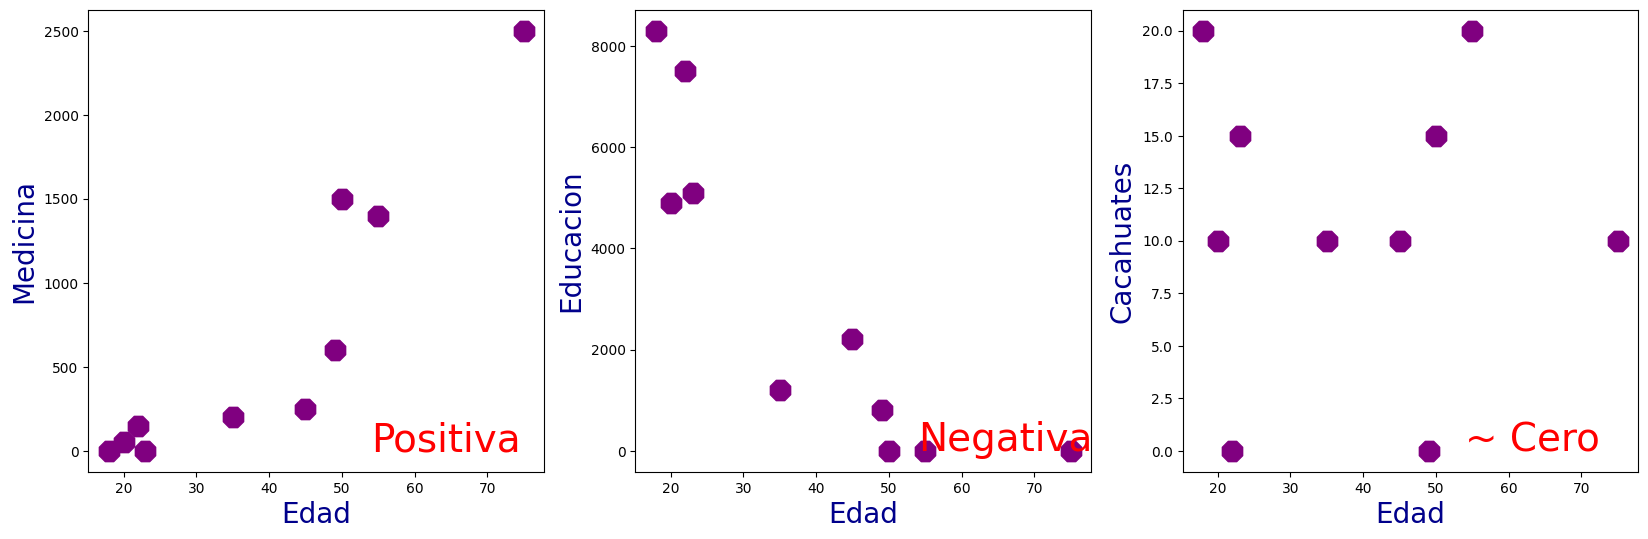





             medicina   educacion
medicina    725027.78 -1923333.33
educacion -1923333.33 10231111.11 

            medicina  cacahuates
medicina   725027.78      816.67
cacahuates    816.67       48.89 

             educacion  cacahuates
educacion  10231111.11     -500.00
cacahuates     -500.00       48.89 



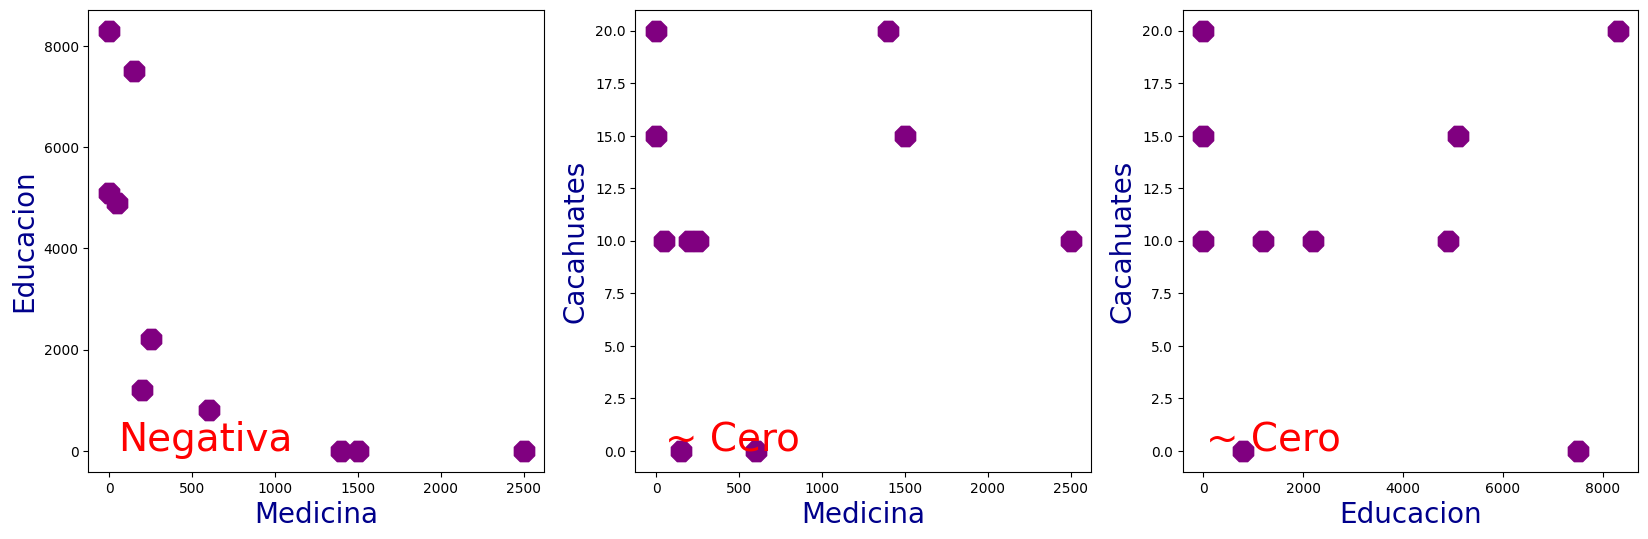

In [14]:
def subgrafica_dispersion(datos, col_a, col_b, fig, posicion, texto): 
    ax = fig.add_subplot(1, 3, posicion)    
    ax.scatter(datos[col_a], datos[col_b], marker="8", s=250, color="purple")
    ax.set_xlabel(col_a.capitalize(), fontsize=20, color="darkblue")
    ax.set_ylabel(col_b.capitalize(), fontsize=20, color="darkblue")
    ax.text(54, 0, texto, fontsize=28, color="red")
    

# Impresión de matrices de covarianza

print(datos[["edad", "medicina"]].cov(), "\n")
print(datos[["edad", "educacion"]].cov(), "\n")
print(datos[["edad", "cacahuates"]].cov(), "\n")

# Gráficas

fig = plt.figure(figsize=(20, 6))
subgrafica_dispersion(datos, "edad", "medicina", fig, 1, "Positiva")     
subgrafica_dispersion(datos, "edad", "educacion", fig, 2, "Negativa")     
subgrafica_dispersion(datos, "edad", "cacahuates", fig, 3, "~ Cero")     
plt.show()


# Impresión de matrices de covarianza

print("\n"*3)
print(datos[["medicina", "educacion"]].cov(), "\n")
print(datos[["medicina", "cacahuates"]].cov(), "\n")
print(datos[["educacion", "cacahuates"]].cov(), "\n")

# Gráficas

fig = plt.figure(figsize=(20, 6))
subgrafica_dispersion(datos, "medicina", "educacion", fig, 1, "Negativa")     
subgrafica_dispersion(datos, "medicina", "cacahuates", fig, 2, "~ Cero")     
subgrafica_dispersion(datos, "educacion", "cacahuates", fig, 3, "~ Cero") 
plt.show()